In [33]:
import sys
sys.path.append('/home/chris/repos/financial_analysis/')
import pandas as pd

from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [34]:
from credentials import *

### Testing the Alpha Vantage API by pulling DAX data

In [35]:
import requests
import json
import pprint

url = "https://www.alphavantage.co/query"
outFile = '../newfile.csv'
function = "TIME_SERIES_DAILY"
symbol = "^GSPC"
api_key = key

data = { "function": function, 
         "symbol": symbol, 
         "apikey": api_key,
         "outputsize": 'compact',
         "datatype": 'csv'} 
page = requests.get(url, params = data)
#pprint.pprint(page.json())

with open(outFile, 'w') as oF:
    oF.write(page.text)

In [36]:
dax = 'DAX'
df = pd.read_csv('../newfile.csv',usecols=["timestamp", "close"]).rename(columns={'close' : 'close_'+dax})

In [37]:
df.head(n=5)

,timestamp,close_DAX
0,2018-03-07,2715.5400
1,2018-03-06,2728.1201
2,2018-03-05,2720.9399
3,2018-03-02,2691.2500
4,2018-03-01,2677.6699


In [38]:
df.loc[(df==0).any(axis=1)].index

Int64Index([], dtype='int64')

In [39]:
df = df.drop(df.loc[(df==0).any(axis=1)].index)
df = df.iloc[::-1]

In [40]:
df.head(n=3)

,timestamp,close_DAX
99,2017-10-12,2550.9299
98,2017-10-13,2553.1699
97,2017-10-16,2557.6399


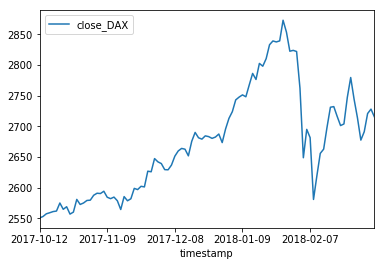

In [41]:
df.plot(x='timestamp',y='close_DAX')

### Now pull a bunch of relevant indices

* Plot time series
* Plot their correlations

In [42]:
indices = [
    '^GSPC', #S&P 500
    '^DJI',  #DowJones 30
    #'^IXIC', #NASDAQ
    '^NYA', #NYSE COMPOSITE (DJ)
    '^XAX',  #NYSE AMEX COMPOSITE INDEX
    #'^BATSK',#BATS 1000 Index
    '^RUT',  #Russell 2000
    '^VIX',  #Vix
    '^FTSE', #FTSE 100
    '^GDAXI',#DAX
    '^FCHI', #CAC 40
    '^STOXX50E', #STOXX 50
    '^N100', #EURONEXT 100
    '^BFX',  #BEL 20 Brussels
    '^N225', #Nikkei
    '^HSI'  #Hangseng
    
    
]

In [43]:
url = "https://www.alphavantage.co/query"
index_data_dir = '../data/'
function = "TIME_SERIES_DAILY"
symbol = "^GDAXI"
api_key = key

for index in indices:
    data = { "function": function, 
         "symbol": index, 
         "apikey": api_key,
         "outputsize": 'compact',
         "datatype": 'csv'} 
    page = requests.get(url, params = data)
    with open(index_data_dir + 'data_' + index.strip('^') + '.csv', 'w') as oF:
        oF.write(page.text)

In [61]:
import glob

allFiles = glob.glob(index_data_dir + "*.csv")
df_indices = pd.DataFrame()
list_ = []
for file_ in allFiles:
    name = str(str(file_).split('_')[1]).split('.')[0]
    print(name)
    df = pd.read_csv(file_,usecols=["timestamp", "close"]).rename(columns={'timestamp' : 'timestamp_'+name, 'close' : 'close_'+name})
    df = df.drop(df.loc[(df==0).any(axis=1)].index)
    df = df.iloc[::-1]
    list_.append(df)
df_indices = pd.concat(list_, axis=1)
#Drop redundant timestamps
df_indices

RUT
GSPC
BFX
N225
HSI
DJI
STOXX50E
GDAXI
NYA
VIX
FTSE
XAX
FCHI
N100


,timestamp_RUT,close_RUT,timestamp_GSPC,close_GSPC,timestamp_BFX,close_BFX,timestamp_N225,close_N225,timestamp_HSI,close_HSI,...,timestamp_VIX,close_VIX,timestamp_FTSE,close_FTSE,timestamp_XAX,close_XAX,timestamp_FCHI,close_FCHI,timestamp_N100,close_N100
0,2018-03-07,1569.2484,2018-03-07,2715.3701,2018-03-07,3924.7200,2018-03-07,21252.7207,2018-03-07,30196.9199,...,2018-03-07,18.65,2018-03-07,7155.9199,2018-03-07,2493.9685,2018-03-07,5195.9800,2018-03-07,1013.1400
1,2018-03-06,1562.2000,2018-03-06,2728.1201,2018-03-06,3916.4099,2018-03-06,21417.7598,2018-03-06,30510.7305,...,2018-03-06,18.36,2018-03-06,7146.7998,2018-03-06,2494.0400,2018-03-06,5170.2300,2018-03-06,1009.2500
2,2018-03-05,1546.0500,2018-03-05,2720.9399,2018-03-05,3907.0400,2018-03-05,21042.0898,2018-03-05,29886.3906,...,2018-03-05,18.73,2018-03-05,7116.0000,2018-03-05,2470.5500,2018-03-05,5167.2300,2018-03-05,1006.2700
3,2018-03-02,1533.1700,2018-03-02,2691.2500,2018-03-02,3869.1799,2018-03-02,21181.6406,2018-03-02,30583.4492,...,2018-03-02,19.59,2018-03-02,7069.8999,2018-03-02,2449.7400,2018-03-02,5136.5801,2018-03-02,998.1800
4,2018-03-01,1507.3900,2018-03-01,2677.6699,2018-03-01,3943.8501,2018-03-01,21724.4707,2018-03-01,31044.2500,...,2018-03-01,22.47,2018-03-01,7175.6001,2018-03-01,2447.3899,2018-03-01,5262.5601,2018-03-01,1018.4400
5,2018-02-28,1512.4500,2018-02-28,2713.8301,2018-02-28,3994.4500,2018-02-28,22068.2402,2018-02-28,30844.7207,...,2018-02-28,19.85,2018-02-28,7231.8999,2018-02-28,2452.2600,2018-02-28,5320.4902,2018-02-28,1028.3400
6,2018-02-27,1536.4700,2018-02-27,2744.2800,2018-02-27,4010.1699,2018-02-27,22389.8594,2018-02-27,31268.6602,...,2018-02-27,18.59,2018-02-27,7282.5000,2018-02-27,2496.6699,2018-02-27,5343.9302,2018-02-27,1032.0800
7,2018-02-26,1559.3300,2018-02-26,2779.6001,2018-02-26,3992.5000,2018-02-26,22153.6309,2018-02-26,31498.5996,...,2018-02-26,15.80,2018-02-26,7289.6001,2018-02-26,2525.2100,2018-02-26,5344.2598,2018-02-26,1032.9900
8,2018-02-23,1549.1899,2018-02-23,2747.3000,2018-02-23,3972.5300,2018-02-23,21892.7793,2018-02-23,31267.1699,...,2018-02-23,16.49,2018-02-23,7244.3999,2018-02-23,2504.5801,2018-02-23,5317.3701,2018-02-23,1026.7100
9,2018-02-22,1529.9900,2018-02-22,2703.9600,2018-02-22,3978.8501,2018-02-22,21736.4395,2018-02-22,30965.6797,...,2018-02-22,18.72,2018-02-22,7252.3999,2018-02-22,2489.6799,2018-02-22,5309.2300,2018-02-22,1024.0200


In [62]:
dax = '^N100'
df = pd.read_csv('../data/data_N100.csv',usecols=["timestamp", "close"]).rename(columns={'close' : 'close_'+dax})

In [63]:
df_indices.shape

(100, 28)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f033615c6a0>,
      dtype=object)

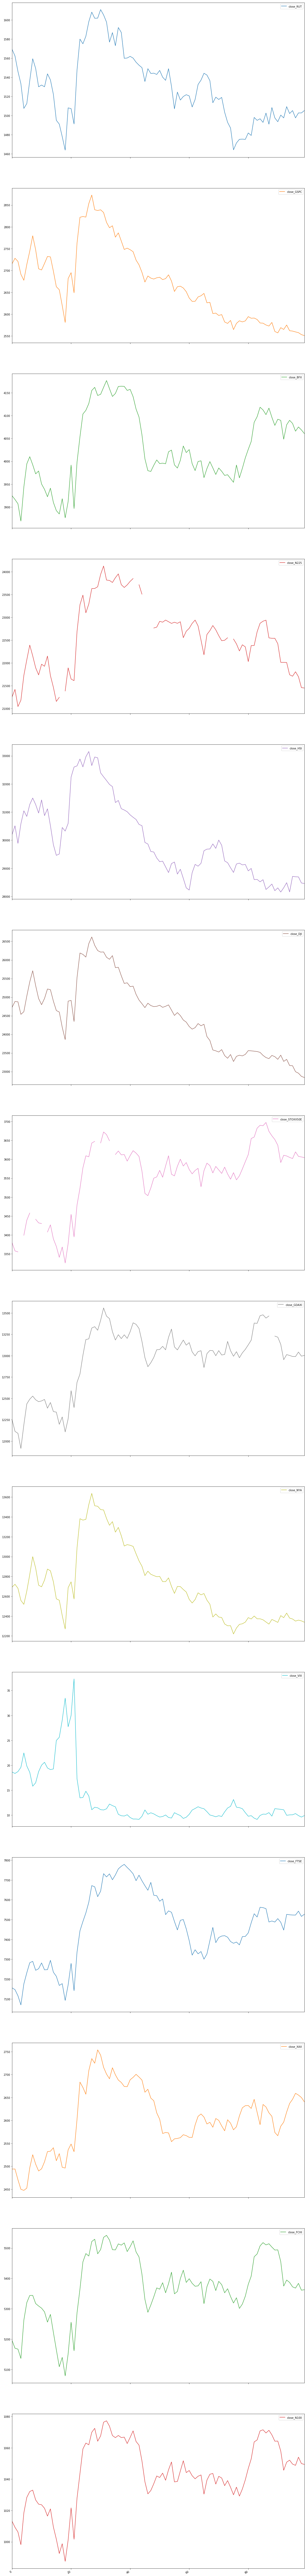

In [64]:
import matplotlib.pyplot as plt

df_indices.plot(subplots=True,figsize=(20, 200))
#plt.xticks(df_indices.timestamp)

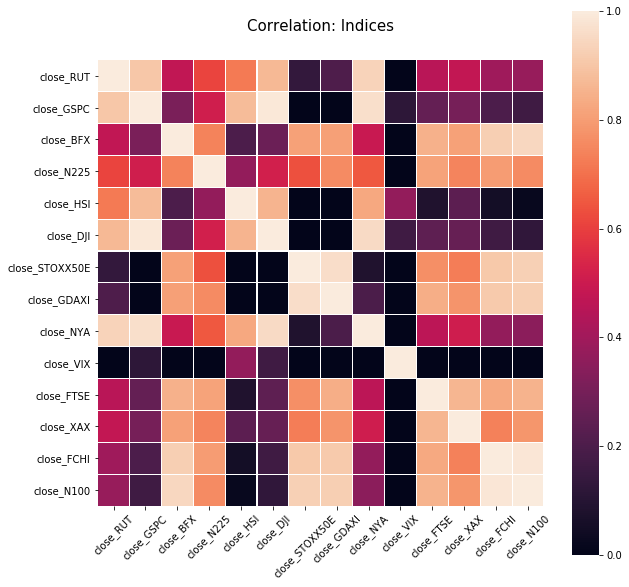

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

df_indices = df_indices.filter(regex='close', axis=1)


plt.figure(figsize=(10,10))
plt.title('Correlation: Indices', y=1.05, size=15)
plot = sns.heatmap(df_indices.corr(), xticklabels=df_indices.columns, yticklabels=df_indices.columns,  linewidths=0.1,vmax=1.0,vmin=0, square=True, linecolor='white')
#plot.set_xticklabels(plot.get_xticklabels(),rotation=30)
#plot.set_ylabel('')
#plot.set_xlabel('')
plt.setp(plot.get_xticklabels(), rotation=45)
plt.setp(plot.get_yticklabels(), rotation=0)

plt.show()



### First simple predictive model

In [66]:
import matplotlib.pyplot as plt
import numpy as np
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from keras.models import Sequential
from keras.layers import LSTM,Dense

In [67]:
np.random.seed(7)

In [72]:
df_indices = df_indices.fillna(0)
df_indices = df_indices.drop(df_indices.loc[(df_indices==0).any(axis=1)].index)
#normalization
scaler = MinMaxScaler(feature_range=(0, 1))
#df_indices = scaler.fit_transform(df_indices.filter(regex='close'))

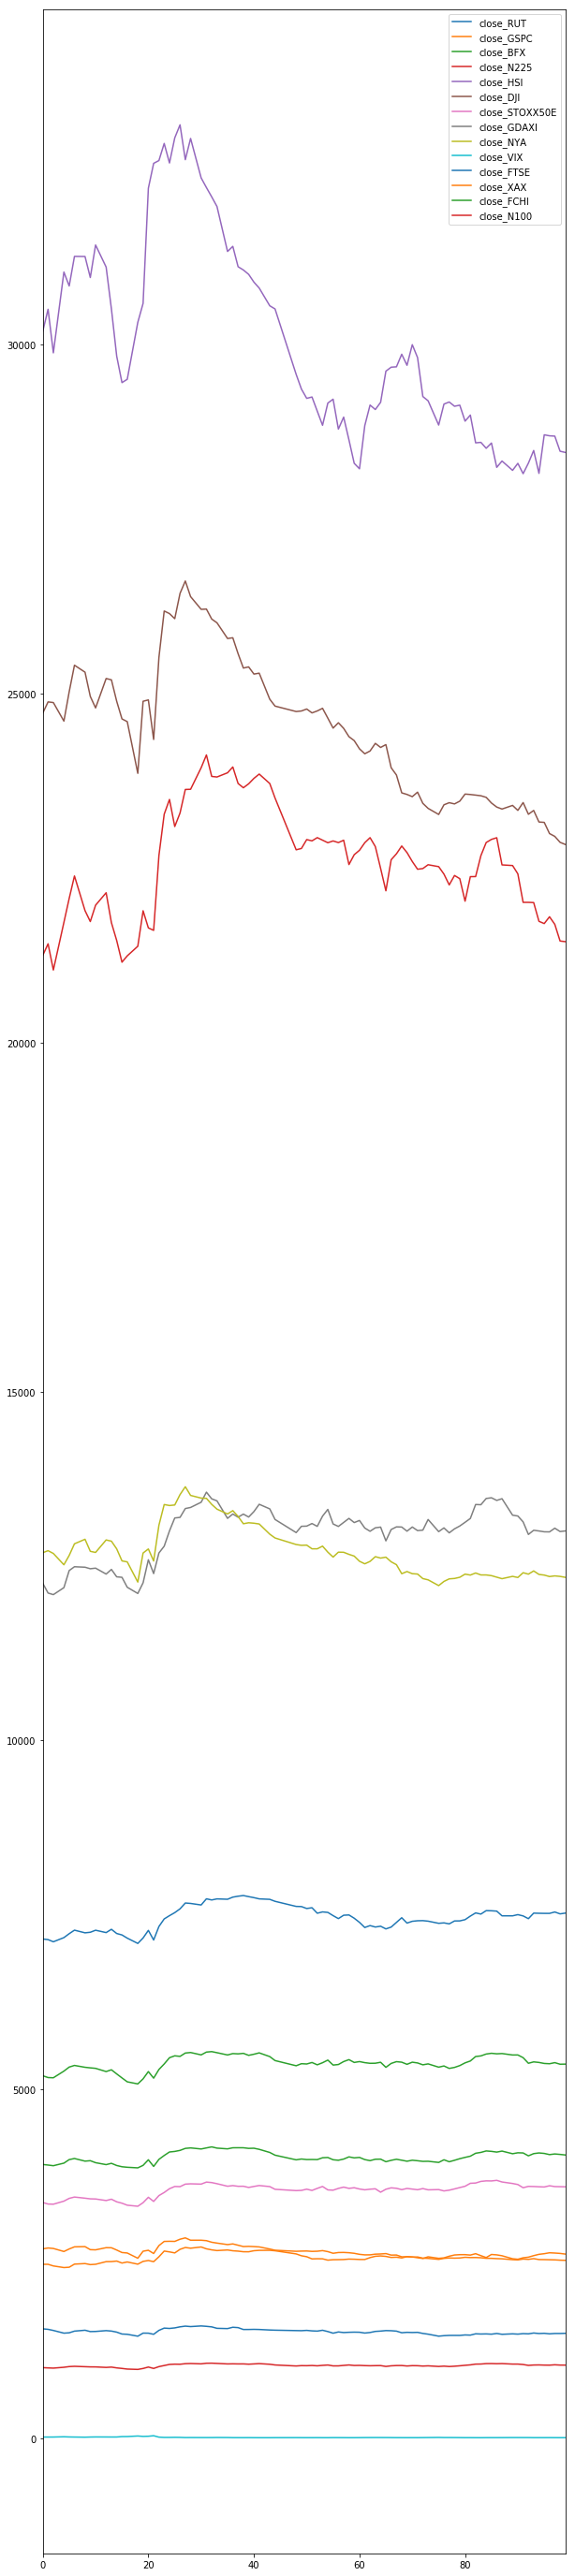

In [73]:
df_indices.plot(figsize=(10,50))

In [76]:
df_indices.shape

(88, 14)

In [ ]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
 
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg
 
# load dataset
dataset = read_csv('pollution.csv', header=0, index_col=0)
values = dataset.values
# integer encode direction
encoder = LabelEncoder()
values[:,4] = encoder.fit_transform(values[:,4])
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
reframed.drop(reframed.columns[[9,10,11,12,13,14,15]], axis=1, inplace=True)
print(reframed.head())
 
# split into train and test sets
values = reframed.values
n_train_hours = 365 * 24
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)
 
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()
 
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)